# MNIST 1D Performance 
This notebook aims to run and train a neural network with 2 hidden layers using the MNIST 1D dataset.

### Import 
Import the libraries necessary to define all the functions needed to run and train a neural network as well as plot the resulting trained function

In [1]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR
import numpy as np
import matplotlib.pyplot as plt
import mnist1d

### Define Input Data 
Import the MNIST 1D dataset and store the data into variables

In [2]:
args = mnist1d.data.get_dataset_args()
data = mnist1d.data.get_dataset(args, path='./mnist1d_data.pkl', download=False, regenerate=False)

Did or could not load data from ./mnist1d_data.pkl. Rebuilding dataset...


### Define Dimensions
Define the dimensions of the input, hidden, and output layer

In [3]:
D_i = 40    # Input dimensions
D_k = 100   # Hidden dimensions
D_o = 10    # Output dimensions

### Define Neural Network Model
Define a neural network model with 2 hidden layers, which are defined through the input, hidden, and output layer dimensions

In [4]:
model = nn.Sequential( 
  nn.Linear(D_i, D_k), 
  nn.ReLU(),
  nn.Linear(D_k, D_k),
  nn.ReLU(), 
  nn.Linear(D_k, D_k),
  nn.ReLU(),
  nn.Linear(D_k, D_o))

### Define He Initialization
Define the He intialization in order to assign variance to the weights of all the layers in the neural network model while keeping the gradients stable to avoid the shrinking or exploding gradient problem

In [5]:
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear): 
    nn.init.kaiming_normal_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)
model.apply(weights_init)

Sequential(
  (0): Linear(in_features=40, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)

### Apply He Initialization to Weights

In [6]:
model.apply(weights_init)

Sequential(
  (0): Linear(in_features=40, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)

### Define Loss Function
Define the cross entropy loss function as the loss function for this neural network

In [7]:
loss_function = torch.nn.CrossEntropyLoss()

### Define the Stochastic Gradient Descent Function
Define the stochastic gradient descent function by initializing its momentum and learning rate

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05, momentum=0.9)

### Define Scheduler
Define a variable (scheduler) that decreases the learning rate by half for every 10 epochs (entire pass through entire dataset)

In [9]:
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
x_train = torch.tensor(data['x'].astype('float32'))
y_train = torch.tensor(data['y'].transpose().astype('int64'))
x_test= torch.tensor(data['x_test'].astype('float32'))
y_test = torch.tensor(data['y_test'].astype('int64'))

### Define Batch
Define a variable (data_loader) to store randomly defined batches of data for the stochastic gradient descent function

In [10]:
data_loader = DataLoader(TensorDataset(x_train,y_train), batch_size=100, shuffle=True, worker_init_fn=np.random.seed(1))

### Initialize Weights
Initialize the value of the weights by using the He initialization function

In [11]:
model.apply(weights_init)

Sequential(
  (0): Linear(in_features=40, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)

### Define Epochs 
Define the number of epochs (entire pass through entire dataset) to run the neural network model over

In [12]:
n_epoch = 50

### Define Loss Array Structures 
Define the array structure for the loss and the % correct for each epoch for both the training and the test set

In [13]:
losses_train = np.zeros((n_epoch))
errors_train = np.zeros((n_epoch))
losses_test = np.zeros((n_epoch))
errors_test = np.zeros((n_epoch))

### Optimize Loss of Neural Network
Optimize the loss of the neural network model by computing the forward and backward pass for each batch of data (back propagation) and updating the value of the parameters using the stochastic gradient descent. Compute the % accurate and loss for both the training and test set for each epoch.

In [14]:
# Optimize the neural network over each epoch
for epoch in range(n_epoch):
  # For each batch of data
  for i, batch in enumerate(data_loader):
    # Retrieve inputs and labels for this batch
    x_batch, y_batch = batch
    # Zero the parameter gradients
    optimizer.zero_grad()
    # Compute the forward pass, return the model's output
    pred = model(x_batch)
    # Compute the loss
    loss = loss_function(pred, y_batch)
    # Compute the backward pass
    loss.backward()
    # Update the position using stocahstic gradient descent (SGD)
    optimizer.step()

  # Compute the statistics by running the whole dataset
  pred_train = model(x_train)
  pred_test = model(x_test)
  _, predicted_train_class = torch.max(pred_train.data, 1)
  _, predicted_test_class = torch.max(pred_test.data, 1)
  errors_train[epoch] = 100 - 100 * (predicted_train_class == y_train).float().sum() / len(y_train)
  errors_test[epoch]= 100 - 100 * (predicted_test_class == y_test).float().sum() / len(y_test)
  losses_train[epoch] = loss_function(pred_train, y_train).item()
  losses_test[epoch]= loss_function(pred_test, y_test).item()
  print(f'Epoch {epoch:5d}, train loss {losses_train[epoch]:.6f}, train error {errors_train[epoch]:3.2f},  test loss {losses_test[epoch]:.6f}, test error {errors_test[epoch]:3.2f}')

  # Track when to update learning rate through scheduler
  scheduler.step()

Epoch     0, train loss 1.566405, train error 63.15,  test loss 1.655140, test error 66.10
Epoch     1, train loss 1.253681, train error 46.10,  test loss 1.443806, test error 55.80
Epoch     2, train loss 1.087158, train error 39.88,  test loss 1.365539, test error 54.10
Epoch     3, train loss 0.964737, train error 34.70,  test loss 1.316721, test error 51.00
Epoch     4, train loss 0.879371, train error 32.12,  test loss 1.235337, test error 48.80
Epoch     5, train loss 0.721282, train error 24.82,  test loss 1.213032, test error 47.50
Epoch     6, train loss 0.599293, train error 20.62,  test loss 1.127798, test error 41.40
Epoch     7, train loss 0.565255, train error 20.15,  test loss 1.193250, test error 43.90
Epoch     8, train loss 0.507651, train error 18.10,  test loss 1.213124, test error 41.70
Epoch     9, train loss 0.428990, train error 15.15,  test loss 1.212392, test error 40.50
Epoch    10, train loss 0.245107, train error 6.35,  test loss 1.077686, test error 37.60


### Plot the Results (% correct)

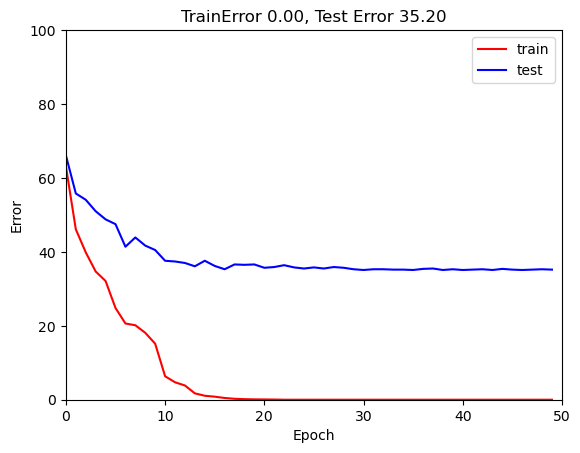

In [15]:
fig, ax = plt.subplots()
ax.plot(errors_train,'r-',label='train')
ax.plot(errors_test,'b-',label='test')
ax.set_ylim(0,100); ax.set_xlim(0,n_epoch)
ax.set_xlabel('Epoch'); ax.set_ylabel('Error')
ax.set_title('TrainError %3.2f, Test Error %3.2f'%(errors_train[-1],errors_test[-1]))
ax.legend()
plt.show()

### Plot the Results (Loss)

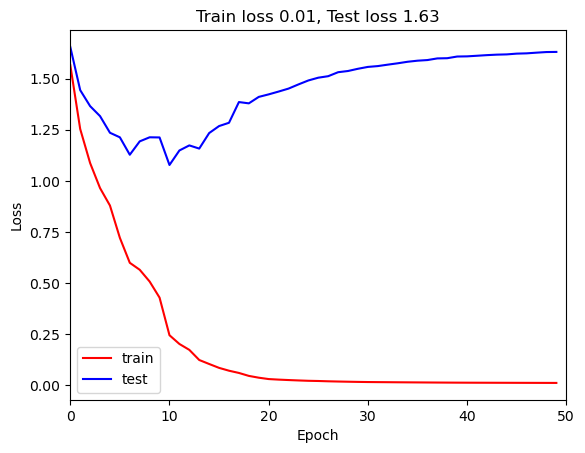

In [16]:
fig, ax = plt.subplots()
ax.plot(losses_train,'r-',label='train')
ax.plot(losses_test,'b-',label='test')
ax.set_xlim(0,n_epoch)
ax.set_xlabel('Epoch'); ax.set_ylabel('Loss')
ax.set_title('Train loss %3.2f, Test loss %3.2f'%(losses_train[-1],losses_test[-1]))
ax.legend()
plt.show()